In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [3]:
#Load the data set
claimants = pd.read_csv("../Dataset/claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [4]:
# dropping the case number columns as it is not required
claimants.drop(["CASENUM"],inplace=True,axis = 1)

In [5]:
claimants

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [6]:
#Shape of the data set
claimants.shape

(1340, 6)

In [7]:
# Removing NA values in data set
claimants = claimants.dropna()
claimants.shape

(1096, 6)

In [8]:
# Dividing our data into input and output variables 
X = claimants.iloc[:,1:]
y = claimants.iloc[:,0]

In [9]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

## Training Accuracy

In [11]:
#Predict for X dataset
y_pred_train = classifier.predict(X_train)

In [12]:
y_pred_train_df = pd.DataFrame({'actual': y_train,
                         'predicted_prob': y_pred_train})

In [13]:
y_pred_train_df

,actual,predicted_prob
470,0,0
423,1,1
1289,0,0
756,0,1
229,1,0
...,...,...
1261,0,1
939,1,1
1028,1,1
683,1,1


In [14]:
from sklearn.metrics import accuracy_score

print(f'Training-set accuracy score: {round(accuracy_score(y_train, y_pred_train),3)}')

Training-set accuracy score: 0.71


## Testing Accuracy

In [15]:
y_pred_test = classifier.predict(X_test)

In [16]:
y_pred_test_df= pd.DataFrame({'actual': y_test,
                         'predicted_prob': y_pred_test})

In [17]:
y_pred_test_df

,actual,predicted_prob
1296,1,0
32,1,1
885,0,0
600,0,1
238,1,1
...,...,...
935,1,1
801,1,1
940,1,1
862,0,1


In [21]:
acc_val = accuracy_score(y_test, y_pred_test)
acc_val_rounded = round(acc_val,4)

In [23]:
print(f'Testing-set accuracy score: {acc_val_rounded}')

Testing-set accuracy score: 0.6909


## Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

print('\nTrue Positives(TP) = ', TP)

print('\nTrue Negatives(TN) = ', TN)

print('\nFalse Positives(FP) = ', FP)

print('\nFalse Negatives(FN) = ', FN)


Confusion matrix

 [[73 45]
 [23 79]]

True Positives(TP) =  73

True Negatives(TN) =  79

False Positives(FP) =  45

False Negatives(FN) =  23


The confusion matrix shows 73 + 45 = 118 correct predictions and 23 + 45 = 68 incorrect predictions.

In this case, we have

True Positives (Actual Positive:1 and Predict Positive:1) - 118
True Negatives (Actual Negative:0 and Predict Negative:0) - 68
False Positives (Actual Negative:0 but Predict Positive:1) - 45 (Type I error)
False Negatives (Actual Positive:1 but Predict Negative:0) - 23 (Type II error)


<AxesSubplot:>

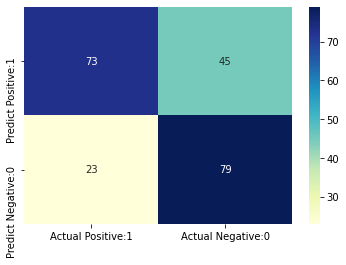

In [25]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


## Classification Report

In [26]:
# print classification accuracy

classification_accuracy = (TP + TN) / (TP + TN + FP + FN)

print(f'Classification accuracy : {round(classification_accuracy,4)}')


Classification accuracy : 0.6909


In [27]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(f'Classification error : {round(classification_error,4)}')


Classification error : 0.3091


### Precision
Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [28]:
# print precision score

precision = TP / float(TP + FP)


print(f'Precision : {round(precision,4)}')

Precision : 0.6186


### Recall or True Positive Rate
Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [29]:
recall = TP / float(TP + FN)

print(f'Recall or Sensitivity : {round(recall,4)}')

Recall or Sensitivity : 0.7604


### False Positive Rate

In [30]:
false_positive_rate = FP / float(FP + TN)


print(f'False Positive Rate : {round(false_positive_rate,4)}')


False Positive Rate : 0.3629


### Specificity

In [31]:
specificity = TN / (TN + FP)

print(f'Specificity : {round(specificity,4)}')


Specificity : 0.6371


### Adjusting the threshold level 

In [34]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = classifier.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.71883491, 0.28116509],
       [0.4385464 , 0.5614536 ],
       [0.64544584, 0.35455416],
       [0.40253055, 0.59746945],
       [0.3666088 , 0.6333912 ],
       [0.29877357, 0.70122643],
       [0.5568445 , 0.4431555 ],
       [0.47821056, 0.52178944],
       [0.34225161, 0.65774839],
       [0.3442668 , 0.6557332 ]])

### Observations

In each row, the numbers sum to 1.
There are 2 columns which correspond to 2 classes - 0 and 1.

Class 0 - predicted probability that they will not hire an attorney.

Class 1 - predicted probability that they will hire an attorney.

Importance of predicted probabilities

We can rank the observations by probability of yes or no .
predict_proba process

Predicts the probabilities

Choose the class with the highest probability

Classification threshold level

There is a classification threshold level of 0.5.

Class 1 - probability of yes is predicted if probability > 0.5.

Class 0 - probability of no  is predicted if probability < 0.5.



In [35]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - Not hiring Attorney (0)', 'Prob of - Hiring Attorney (1)'])

y_pred_prob_df

,Prob of - Not hiring Attorney (0),Prob of - Hiring Attorney (1)
0,0.718835,0.281165
1,0.438546,0.561454
2,0.645446,0.354554
3,0.402531,0.597469
4,0.366609,0.633391
5,0.298774,0.701226
6,0.556845,0.443155
7,0.478211,0.521789
8,0.342252,0.657748
9,0.344267,0.655733


In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.76      0.62      0.68       118
           1       0.64      0.77      0.70       102

    accuracy                           0.69       220
   macro avg       0.70      0.70      0.69       220
weighted avg       0.70      0.69      0.69       220



In [37]:
# print the first 10 predicted probabilities for class 1 - Probability of rain

classifier.predict_proba(X_test)[0:10, 1]

array([0.28116509, 0.5614536 , 0.35455416, 0.59746945, 0.6333912 ,
       0.70122643, 0.4431555 , 0.52178944, 0.65774839, 0.6557332 ])

In [41]:
# store the predicted probabilities for class 1 - Probability of hiring Attorney

y_pred1 = classifier.predict_proba(X_test)
y_pred1[:, 1]

array([2.81165089e-01, 5.61453596e-01, 3.54554157e-01, 5.97469449e-01,
       6.33391198e-01, 7.01226435e-01, 4.43155498e-01, 5.21789443e-01,
       6.57748393e-01, 6.55733204e-01, 3.25337876e-01, 4.52289872e-01,
       1.85487785e-01, 6.57442011e-01, 6.39876461e-01, 6.92201781e-01,
       2.34064477e-01, 5.31958027e-01, 6.78998815e-01, 4.38292836e-01,
       6.73262761e-01, 6.82063365e-01, 2.97612905e-01, 6.93559530e-01,
       6.43329894e-01, 4.36740650e-01, 6.84518678e-01, 3.37658012e-01,
       4.81185915e-01, 6.84612233e-01, 1.23931921e-12, 1.09774781e-01,
       1.05184218e-06, 6.73450968e-01, 6.15532756e-01, 6.08888443e-01,
       6.13123210e-01, 7.21127475e-01, 6.50395529e-01, 5.86400394e-01,
       6.30236839e-01, 2.79151002e-01, 6.08333792e-01, 2.68982543e-01,
       6.09611321e-01, 3.51802230e-01, 3.15807917e-01, 5.26195951e-01,
       3.98125080e-01, 6.72054398e-01, 3.10861504e-01, 3.33050332e-01,
       4.12208918e-01, 5.64051488e-01, 5.95449675e-01, 6.92072880e-01,
      

In [ ]:
### Try different thresholds

In [43]:
pred_threshold = pd.DataFrame( columns = ['Threshold',
                               'Correct_Predictions',
                               'FP',
                               'FN',
                               'Precision',
                               'Recall'],index=None) 
pred_threshold

,Threshold,Correct_Predictions,FP,FN,Precision,Recall


In [44]:
from sklearn.preprocessing import binarize

for i in range(1,10):
    
    cm1=0
    
    y_pred1 = classifier.predict_proba(X_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1, i/10)
    
    cm1 = confusion_matrix(y_test, y_pred2)

    TP = cm1[0,0]
    TN = cm1[1,1]
    FP = cm1[0,1]
    FN = cm1[1,0]
    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
   
    pred_threshold = pred_threshold.append({'Threshold':i,
                               'Correct_Predictions':TP+FP,
                               'FP':FP,
                               'FN':FN,
                               'Precision':TP/(TP+FP),
                               'Recall':TP/(TP+FN)}, ignore_index=True)  
    


In [45]:
pred_threshold

,Threshold,Correct_Predictions,FP,FN,Precision,Recall
0,1.0,118.0,107.0,0.0,0.093220,1.000000
1,2.0,118.0,96.0,1.0,0.186441,0.956522
2,3.0,118.0,82.0,6.0,0.305085,0.857143
3,4.0,118.0,58.0,11.0,0.508475,0.845070
4,5.0,118.0,45.0,23.0,0.618644,0.760417
5,6.0,118.0,24.0,43.0,0.796610,0.686131
6,7.0,118.0,4.0,84.0,0.966102,0.575758
7,8.0,118.0,0.0,102.0,1.000000,0.536364
8,9.0,118.0,0.0,102.0,1.000000,0.536364


### Comments
+ In binary problems, the threshold of 0.5 is used by default to convert predicted probabilities into class predictions.
+ Threshold can be adjusted to increase sensitivity or specificity.
+ Precision and Recall have an inverse relationship. Increasing one would always decrease the other and vice versa.
+ We can see that increasing the threshold level results in increased accuracy.
+ Adjusting the threshold level should be one of the last step you do in the model-building process.


## Check for overfitting and underfitting


In [ ]:
# print the scores on training and test set

print(f'Training set score: {round(classifier.score(X_train, y_train),4)}')

print(f'Test set score: {round(classifier.score(X_test, y_test),4)}')


<p> The training-set accuracy score is 0.7100 while the test-set accuracy to be 0.6909. </p>
<p> These two values are quite comparable. So, there is no overfitting. </p>

In [ ]:
# ROC Curve

## ROC Curve
+ Another tool to measure the classification model performance visually is ROC Curve.
+ <b> ROC Curve </b> stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

+ The ROC Curve plots the True Positive Rate (<b>TPR </b>) against the False Positive Rate (<b>FPR</b>) at various threshold levels.

+ True Positive Rate (TPR) is also called <b><font color='maroon'> Recall</font></b>. It is defined as the ratio of TP to (TP + FN).

+ False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

+ In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).



In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve( y_test, y_pred1)


plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Hiring Attorney classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


## AUC-ROC
+ ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. 
+ It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

+ So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred1)

In [ ]:
auc

+ ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

+ ROC AUC of our model is reasonably high. So, we can conclude that our classifier does a good job in predicting whether a person will hire an attorney or not.

## Conclusions

+ The logistic regression model accuracy score is 0.8501. So, the model does a very good job in predicting whether or not a person would hire an attorney.

+ The model shows no signs of overfitting.

+ Increasing the threshold level results in increased accuracy.

+ ROC AUC of our model is reasonably high. So, we can conclude that our classifier does a good job in predicting whether a person will hire an attorney or not.
